In [1]:
import sys
sys.path.insert(0, '../')
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from util import optimiser

In [2]:
# the cost function we would like to minimise
def f(x,y):
    return np.mean(3*x**2 + 6*x*y**2 - 2*x**2*y - 7*x*y,axis=0)

Text(0.5, 1.0, 'True Distribution of Y')

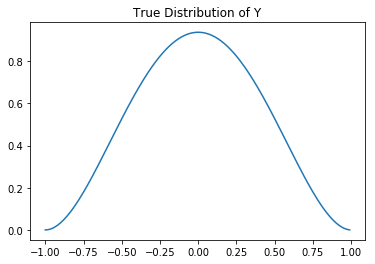

In [3]:
# Define the true distribution
Y = st.beta(a = 3,b=3,loc=-1,scale=2)

# plot the pdf within the range
x = np.arange (-1, 1, 0.01)
z = Y.pdf(x)
plt.plot(x,z)
plt.title("True Distribution of Y")

In [4]:
saa = optimiser.SAA(f,0.0)

In [5]:
samples = Y.rvs(100)

In [6]:
answer = saa.solve(samples)[0]

In [7]:
bagging = optimiser.BaggingSolver(1000,
                                  objective_function=f,
                                  initial_conditions=answer)

In [8]:
answer

-0.1292614129554353

In [9]:
bagging.solve(samples)

array([-0.12779349])

In [10]:
mle = optimiser.MLESolver(st.beta,
                          objective_function=f,
                          initial_conditions=answer)

In [11]:
mle.solve(samples)

(2.620422336814643, 1.7906265822092413, -1.0018274338528763, 1.6810044311701615)


array([-0.13458901])